In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model/"

In [3]:
from utils import get_dataset_from_folders, get_binary_predictions, get_number_cells, compute_jaccard_score

test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images.')

accuracy_only_background = np.mean(test_masks == 0)
print(f"The accuracy achieved by predicting always background: {accuracy_only_background}")

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images.
The accuracy achieved by predicting always background: 0.9329361560297947
16201 cells were counted in total over all masks.


In [4]:
def show_image_mask(image, mask):
    fig, axes = plt.subplots(1, 2)
    ax_image, ax_mask = axes
    ax_image.imshow(image, 'gray')
    ax_image.axis('off')
    ax_mask.imshow(mask, 'gray')
    ax_mask.axis('off')
    plt.show()
    
def show_image_pred(image, model):
    pred = get_binary_predictions(image[None, :], model)
    show_image_mask(image, pred.squeeze())
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    predictions = get_binary_predictions(images, model)
    accuracy = np.mean(predictions==masks)
    jaccard_score = compute_jaccard_score(predictions, masks)

    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
        
    print(f"Accuracy                      : {accuracy}")
    print(f"Average Jaccard score         : {jaccard_score}")
    print(f"Number of cells in predictions: {number_cells_predictions}")
    print(f"Number of cells in masks      : {number_cells_masks}")

    return accuracy, jaccard_score, number_cells_predictions, number_cells_masks


def plot_all(x, accuracies, jaccard_scores, number_cells_predictions, number_cells_masks):
    plt.figure()
    plt.title("Accuracy")
    plt.plot(x, accuracies)
    
    plt.figure()
    plt.title("Number of cells detected")
    plt.plot(x, number_cells_predictions)
    if isinstance(number_cells_masks, int):
        plt.hlines(number_cells_masks, min(x), max(x), color='orange', linestyle='--')
    else:    
        plt.plot(x, number_cells_masks, color='orange', linestyle='--')
    
    plt.figure()
    plt.title("Jaccard Score")
    plt.plot(x, jaccard_scores)

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow
from distortions import add_gaussian, zoom_image, add_gaussian_noise

In [6]:
model = tensorflow.keras.models.load_model(model_save_path)

Accuracy                      : 0.985103322945389
Average Jaccard score         : 0.8115533016258761
Number of cells in predictions: 18099
Number of cells in masks      : 16201


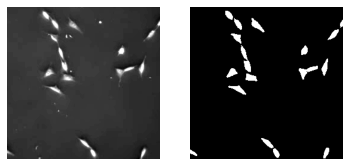

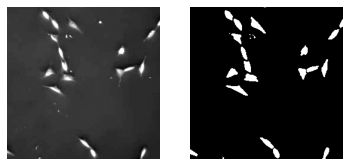

Accuracy                      : 0.9888960296032475
Average Jaccard score         : 0.8538709982394119
Number of cells in predictions: 17297
Number of cells in masks      : 16201


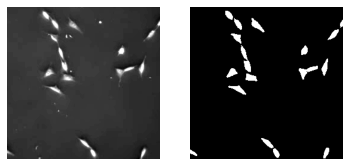

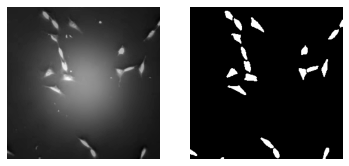

Accuracy                      : 0.9893728518018535
Average Jaccard score         : 0.8576850563483673
Number of cells in predictions: 16899
Number of cells in masks      : 16201


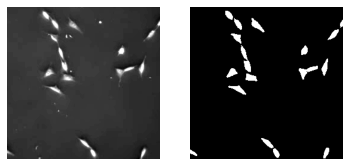

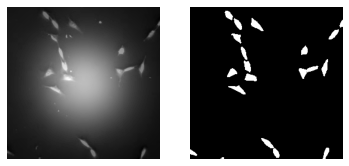

Accuracy                      : 0.9882182700961244
Average Jaccard score         : 0.8405803641997708
Number of cells in predictions: 16620
Number of cells in masks      : 16201


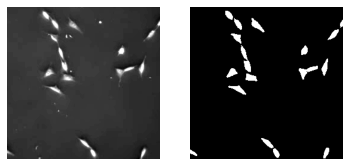

Accuracy                      : 0.9862910251991421
Average Jaccard score         : 0.8131906852295524
Number of cells in predictions: 16451
Number of cells in masks      : 16201


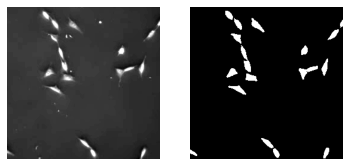

Accuracy                      : 0.9838735543045343
Average Jaccard score         : 0.7795986650050503
Number of cells in predictions: 16244
Number of cells in masks      : 16201


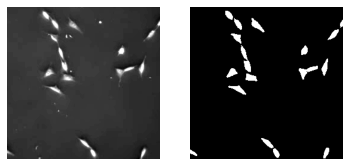

Accuracy                      : 0.9810398176604627
Average Jaccard score         : 0.7404217075110199
Number of cells in predictions: 15937
Number of cells in masks      : 16201


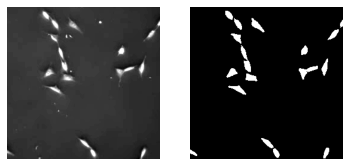

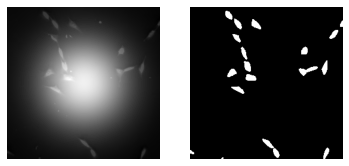

Accuracy                      : 0.9779281017827053
Average Jaccard score         : 0.6969939075004675
Number of cells in predictions: 15518
Number of cells in masks      : 16201


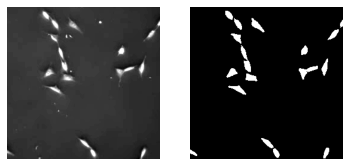

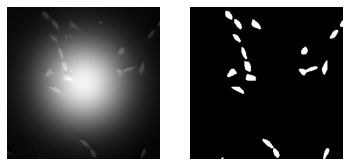

Accuracy                      : 0.9743529375861673
Average Jaccard score         : 0.6460929853867263
Number of cells in predictions: 14989
Number of cells in masks      : 16201


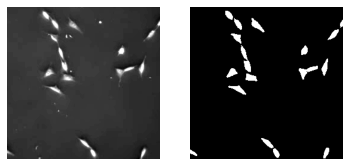

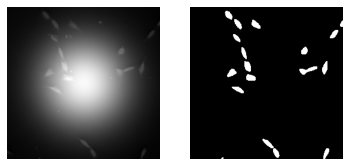

Accuracy                      : 0.9704448625153186
Average Jaccard score         : 0.5898623024657494
Number of cells in predictions: 14213
Number of cells in masks      : 16201


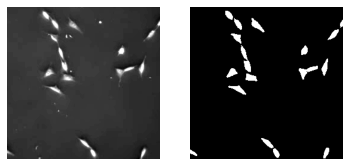

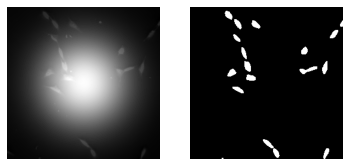

Accuracy                      : 0.9665588678098193
Average Jaccard score         : 0.5333046107619875
Number of cells in predictions: 13393
Number of cells in masks      : 16201


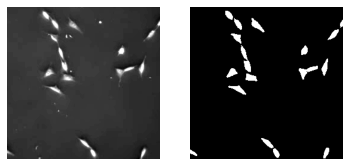

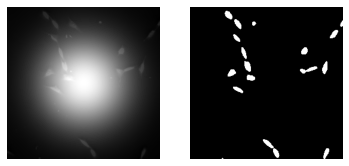

Accuracy                      : 0.9625931384516697
Average Jaccard score         : 0.4752765599025035
Number of cells in predictions: 12339
Number of cells in masks      : 16201


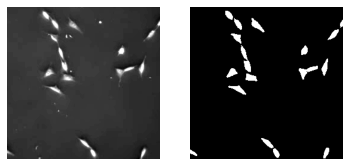

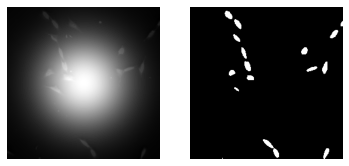

Accuracy                      : 0.9588335523418352
Average Jaccard score         : 0.4200252536278787
Number of cells in predictions: 11281
Number of cells in masks      : 16201


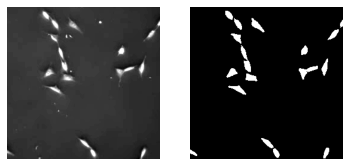

Accuracy                      : 0.9553986493278952
Average Jaccard score         : 0.36795051671748374
Number of cells in predictions: 10224
Number of cells in masks      : 16201


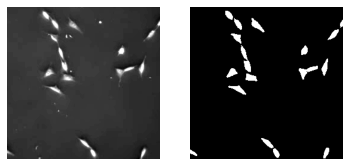

Accuracy                      : 0.952208604999617
Average Jaccard score         : 0.3189198504635837
Number of cells in predictions: 9232
Number of cells in masks      : 16201


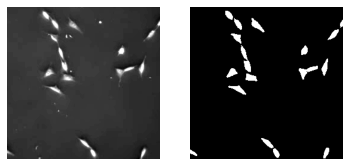

Accuracy                      : 0.9493438720703125
Average Jaccard score         : 0.2737665663004757
Number of cells in predictions: 8209
Number of cells in masks      : 16201


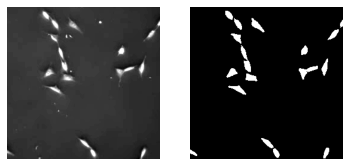

Accuracy                      : 0.9467761469822303
Average Jaccard score         : 0.23257395486460714
Number of cells in predictions: 7252
Number of cells in masks      : 16201


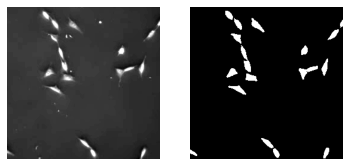

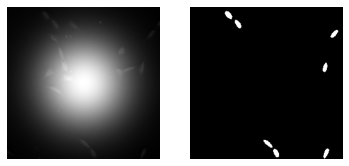

Accuracy                      : 0.9444742240157782
Average Jaccard score         : 0.19599910677813379
Number of cells in predictions: 6352
Number of cells in masks      : 16201


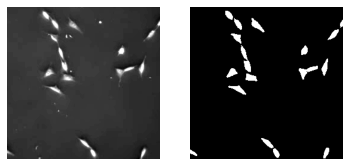

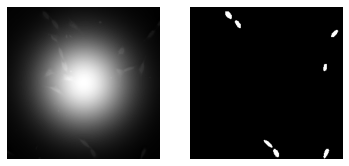

Accuracy                      : 0.9424965353573069
Average Jaccard score         : 0.16408678772540194
Number of cells in predictions: 5568
Number of cells in masks      : 16201


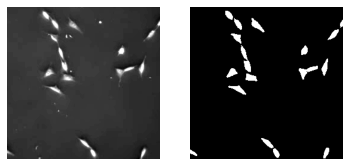

Accuracy                      : 0.940836139753753
Average Jaccard score         : 0.1369605159161378
Number of cells in predictions: 4870
Number of cells in masks      : 16201


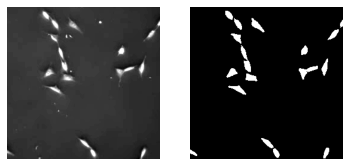

Accuracy                      : 0.9393817078833486
Average Jaccard score         : 0.11257264194487103
Number of cells in predictions: 4269
Number of cells in masks      : 16201


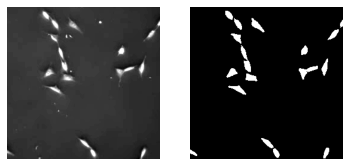

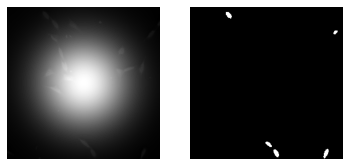

Accuracy                      : 0.9381553500306372
Average Jaccard score         : 0.09148842923757487
Number of cells in predictions: 3681
Number of cells in masks      : 16201


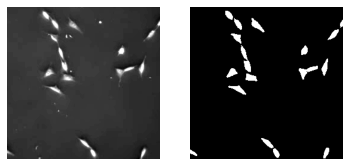

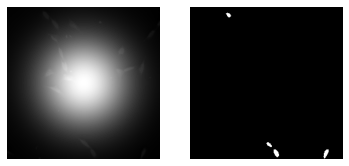

Accuracy                      : 0.9371310065774356
Average Jaccard score         : 0.07412567764640113
Number of cells in predictions: 3151
Number of cells in masks      : 16201


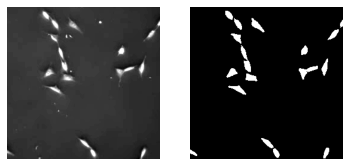

Accuracy                      : 0.9362569173177083
Average Jaccard score         : 0.05945073502630213
Number of cells in predictions: 2708
Number of cells in masks      : 16201


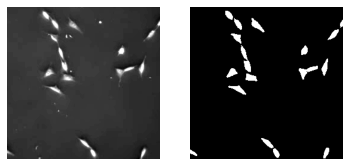

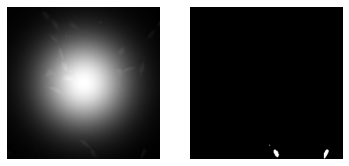

Accuracy                      : 0.93554214776731
Average Jaccard score         : 0.04722947961700852
Number of cells in predictions: 2339
Number of cells in masks      : 16201


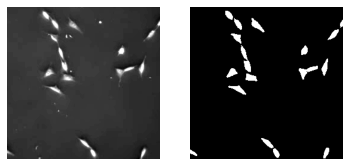

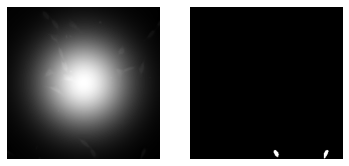

Accuracy                      : 0.9349845437442555
Average Jaccard score         : 0.03758012825924081
Number of cells in predictions: 2024
Number of cells in masks      : 16201


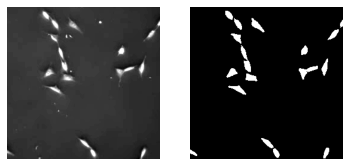

Accuracy                      : 0.9345162784352022
Average Jaccard score         : 0.029423827957586107
Number of cells in predictions: 1769
Number of cells in masks      : 16201


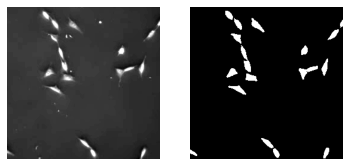

Accuracy                      : 0.9341365739410998
Average Jaccard score         : 0.02283254278184372
Number of cells in predictions: 1521
Number of cells in masks      : 16201


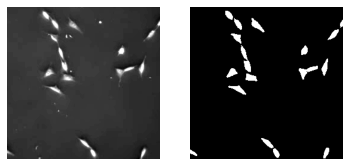

Accuracy                      : 0.9338451011508119
Average Jaccard score         : 0.017720806713033842
Number of cells in predictions: 1328
Number of cells in masks      : 16201


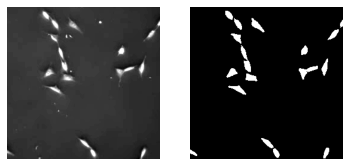

Accuracy                      : 0.9336105047487745
Average Jaccard score         : 0.013523273096534403
Number of cells in predictions: 1186
Number of cells in masks      : 16201


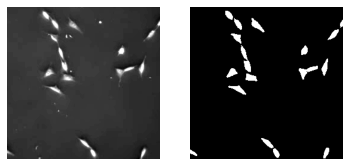

Accuracy                      : 0.9334203084309896
Average Jaccard score         : 0.010078977209279898
Number of cells in predictions: 1040
Number of cells in masks      : 16201


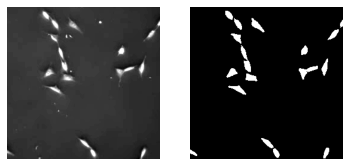

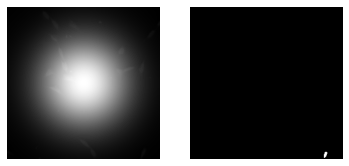

Accuracy                      : 0.9332819919960171
Average Jaccard score         : 0.007480246454051257
Number of cells in predictions: 927
Number of cells in masks      : 16201


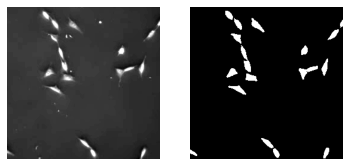

Accuracy                      : 0.9331757489372702
Average Jaccard score         : 0.005412880541262199
Number of cells in predictions: 832
Number of cells in masks      : 16201


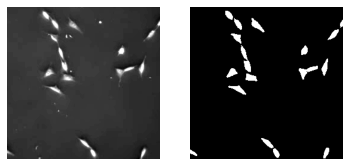

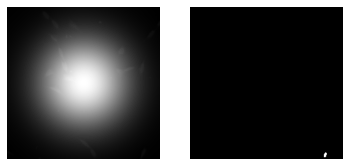

Accuracy                      : 0.9331103156594669
Average Jaccard score         : 0.004027431330757168
Number of cells in predictions: 761
Number of cells in masks      : 16201


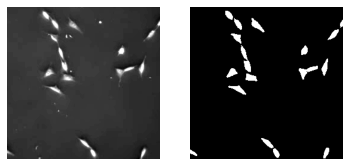

Accuracy                      : 0.9330648085650276
Average Jaccard score         : 0.0030503027344016245
Number of cells in predictions: 703
Number of cells in masks      : 16201


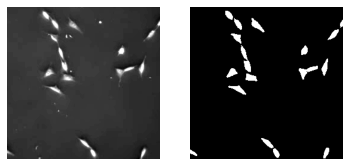

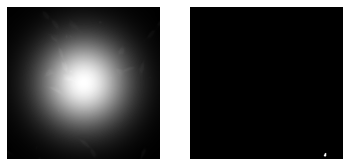

Accuracy                      : 0.9330282173904718
Average Jaccard score         : 0.002226795992827791
Number of cells in predictions: 673
Number of cells in masks      : 16201


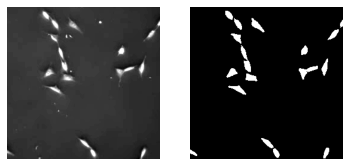

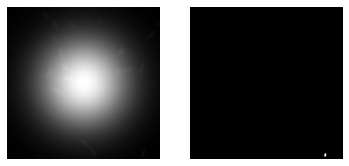

Accuracy                      : 0.9329992855296415
Average Jaccard score         : 0.001571097323359627
Number of cells in predictions: 634
Number of cells in masks      : 16201


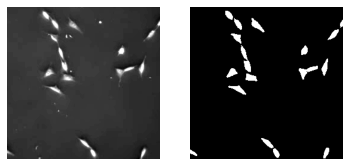

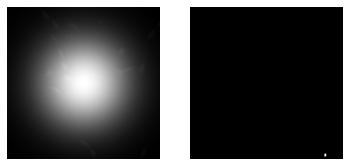

Accuracy                      : 0.932981274174709
Average Jaccard score         : 0.0011646075125906186
Number of cells in predictions: 609
Number of cells in masks      : 16201


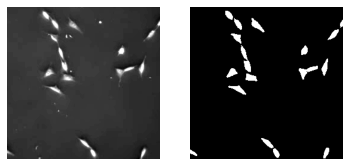

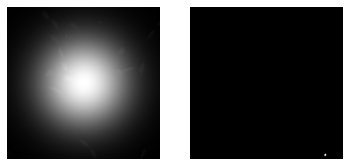

Accuracy                      : 0.9329694860121783
Average Jaccard score         : 0.0008760600905800209
Number of cells in predictions: 591
Number of cells in masks      : 16201


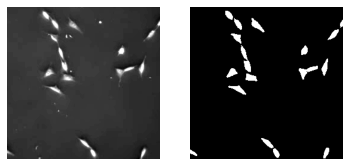

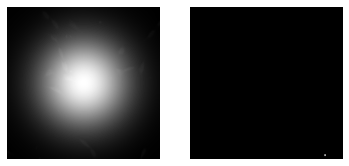

Accuracy                      : 0.9329608692842372
Average Jaccard score         : 0.0006450536575705733
Number of cells in predictions: 578
Number of cells in masks      : 16201


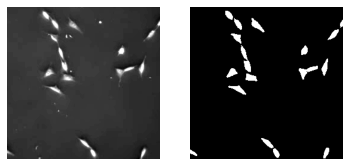

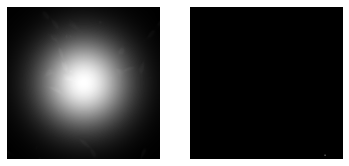

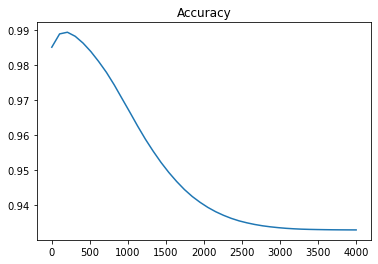

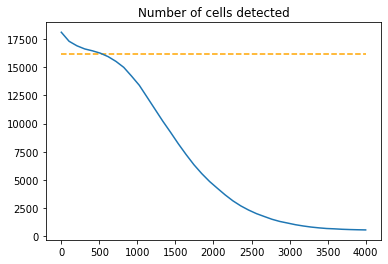

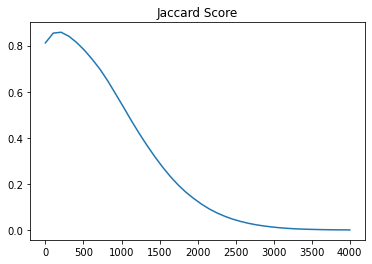

In [7]:
amplitudes = np.linspace(0, 4000, 40)
accuracies = []
jaccard_scores = []
number_cells_predictions = []
for amplitude in amplitudes:
    added_gaussian_test_images = []
    
    for image in test_images:
        added_gaussian_test_images.append(add_gaussian(image, amplitude))
    
    accuracy, jaccard, n_cells_pred, _ = evaluate_model(np.array(added_gaussian_test_images), test_masks, model, number_cells_masks)
    accuracies.append(accuracy)
    jaccard_scores.append(jaccard)
    number_cells_predictions.append(n_cells_pred)
    
    show_image_mask(test_images[0], test_masks[0])
    show_image_pred(added_gaussian_test_images[0], model)
    
plot_all(amplitudes, accuracies, jaccard_scores, number_cells_predictions, number_cells_masks)

Accuracy                      : 0.9954705331839767
Average Jaccard score         : 0.06400377233190731
Number of cells in predictions: 1380
Number of cells in masks      : 10297


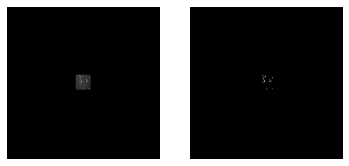

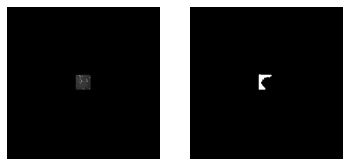

Accuracy                      : 0.9814226636699602
Average Jaccard score         : 0.5304540845052511
Number of cells in predictions: 13754
Number of cells in masks      : 15255


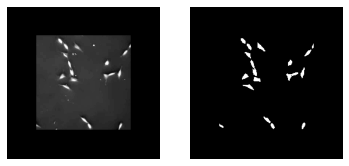

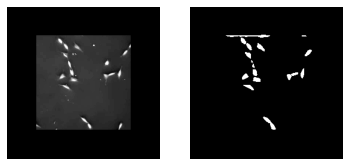

Accuracy                      : 0.9882006776099111
Average Jaccard score         : 0.8363883841490408
Number of cells in predictions: 13440
Number of cells in masks      : 12790


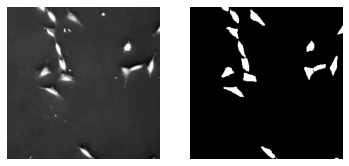

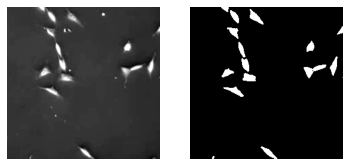

Accuracy                      : 0.9774921192842372
Average Jaccard score         : 0.6629473118782852
Number of cells in predictions: 7738
Number of cells in masks      : 6602


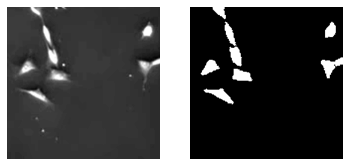

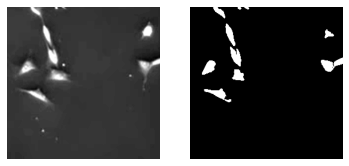

Accuracy                      : 0.974556058995864
Average Jaccard score         : 0.620587593936358
Number of cells in predictions: 5300
Number of cells in masks      : 4225


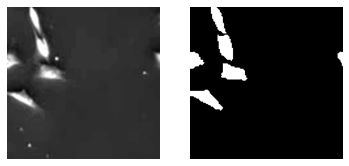

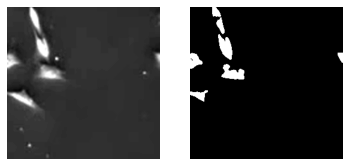

Accuracy                      : 0.9730107026941636
Average Jaccard score         : 0.5785575634198621
Number of cells in predictions: 3921
Number of cells in masks      : 3101


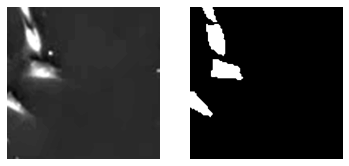

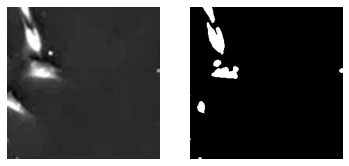

Accuracy                      : 0.9694427789426318
Average Jaccard score         : 0.49318894092490007
Number of cells in predictions: 3040
Number of cells in masks      : 2375


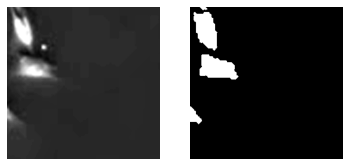

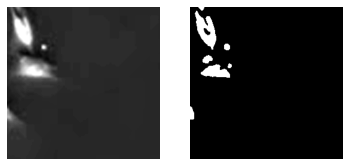

Accuracy                      : 0.9654574824314491
Average Jaccard score         : 0.3975246770945851
Number of cells in predictions: 2473
Number of cells in masks      : 1957


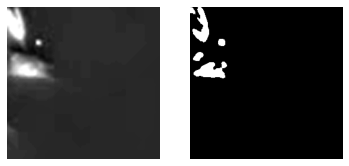

Accuracy                      : 0.961974229999617
Average Jaccard score         : 0.3291620668888645
Number of cells in predictions: 2064
Number of cells in masks      : 1678


Accuracy                      : 0.9577728570676317
Average Jaccard score         : 0.24918143893589403
Number of cells in predictions: 1785
Number of cells in masks      : 1484


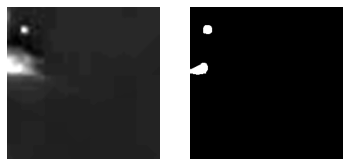

Accuracy                      : 0.9545773375268076
Average Jaccard score         : 0.1961464697139922
Number of cells in predictions: 1592
Number of cells in masks      : 1343


Accuracy                      : 0.9516817878274356
Average Jaccard score         : 0.1544471071404681
Number of cells in predictions: 1406
Number of cells in masks      : 1241


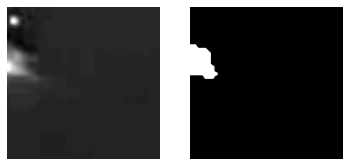

Accuracy                      : 0.9493995816099877
Average Jaccard score         : 0.12323039738742632
Number of cells in predictions: 1349
Number of cells in masks      : 1164


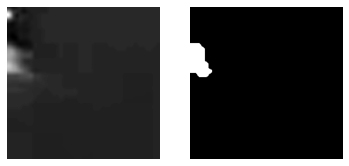

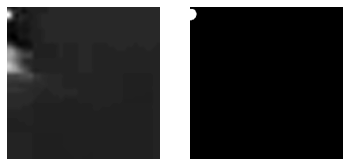

Accuracy                      : 0.9462309295055913
Average Jaccard score         : 0.087148852745457
Number of cells in predictions: 1179
Number of cells in masks      : 1083


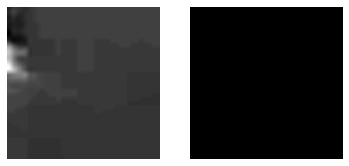

Accuracy                      : 0.9446891635071998
Average Jaccard score         : 0.07108766421676178
Number of cells in predictions: 1172
Number of cells in masks      : 1043


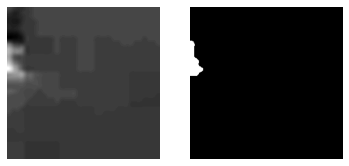

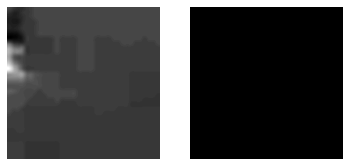

Accuracy                      : 0.9432775759229473
Average Jaccard score         : 0.05510519317473719
Number of cells in predictions: 1104
Number of cells in masks      : 1009


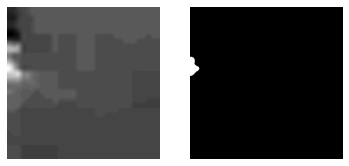

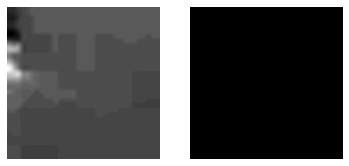

Accuracy                      : 0.9421145869236366
Average Jaccard score         : 0.0384587954656407
Number of cells in predictions: 1000
Number of cells in masks      : 971


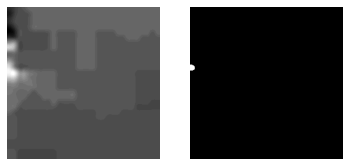

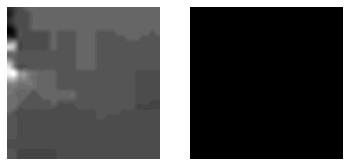

Accuracy                      : 0.9412983314663756
Average Jaccard score         : 0.029650545841987105
Number of cells in predictions: 891
Number of cells in masks      : 924


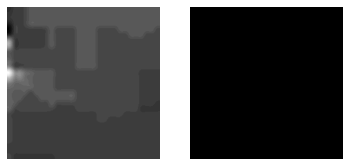

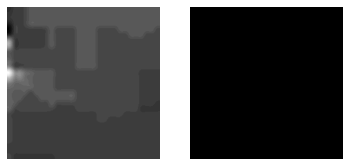

Accuracy                      : 0.9406957888135723
Average Jaccard score         : 0.0197562522974376
Number of cells in predictions: 791
Number of cells in masks      : 875


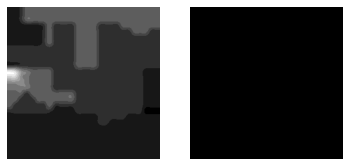

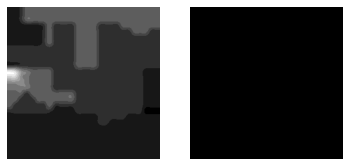

Accuracy                      : 0.9403682035558364
Average Jaccard score         : 0.01258543248018344
Number of cells in predictions: 748
Number of cells in masks      : 847


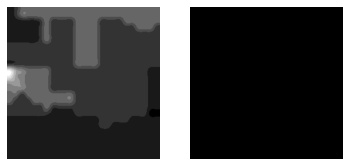

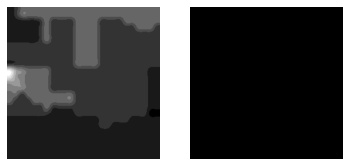

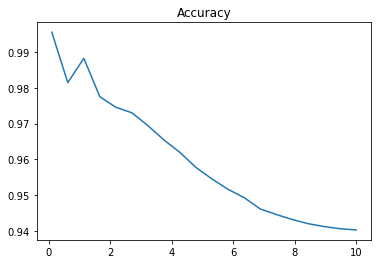

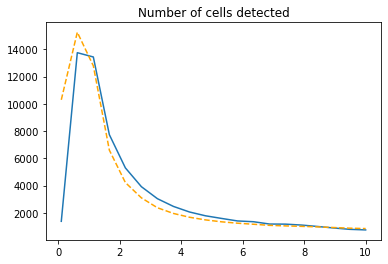

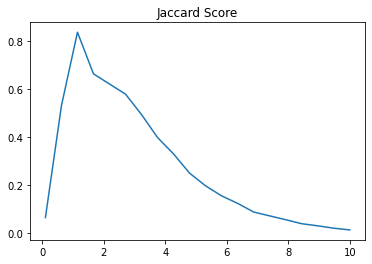

In [8]:
zooms = np.linspace(1e-1, 10, 20)
accuracies = []
jaccard_scores = []
number_cells_predictions = []
number_cells_masks_zoomed = []
for zoom in zooms:
    zoomed_test_images = []
    zoomed_test_masks = []
    
    for image, mask in zip(test_images, test_masks):
        zoomed_test_images.append(zoom_image(image, zoom))
        zoomed_test_masks.append(zoom_image(mask, zoom, val_padding=0))

    accuracy, jaccard, n_cells_pred, n_cells_masks = evaluate_model(np.array(zoomed_test_images), np.array(zoomed_test_masks), model)
    accuracies.append(accuracy)
    jaccard_scores.append(jaccard)
    number_cells_predictions.append(n_cells_pred)
    number_cells_masks_zoomed.append(n_cells_masks)
    
    show_image_mask(zoomed_test_images[0], zoomed_test_masks[0])
    show_image_pred(zoomed_test_images[0], model)
    
plot_all(zooms, accuracies, jaccard_scores, number_cells_predictions, number_cells_masks_zoomed)

Accuracy                      : 0.985103322945389
Average Jaccard score         : 0.8115533016258761
Number of cells in predictions: 18099
Number of cells in masks      : 16201


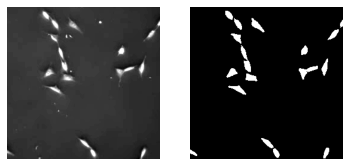

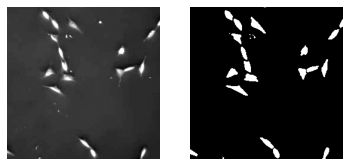

Accuracy                      : 0.9852031632965687
Average Jaccard score         : 0.8077511070667129
Number of cells in predictions: 19339
Number of cells in masks      : 16201


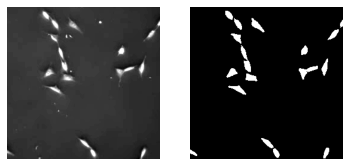

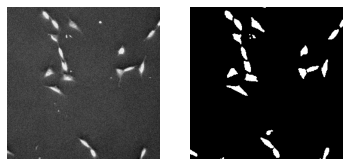

Accuracy                      : 0.9810619877833946
Average Jaccard score         : 0.754177009107256
Number of cells in predictions: 29364
Number of cells in masks      : 16201


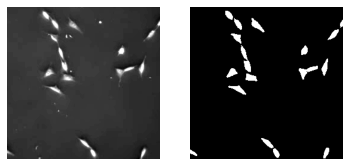

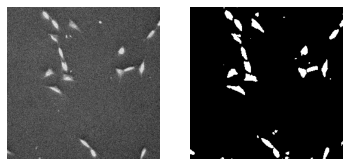

Accuracy                      : 0.9733993530273437
Average Jaccard score         : 0.6696885848435116
Number of cells in predictions: 42960
Number of cells in masks      : 16201


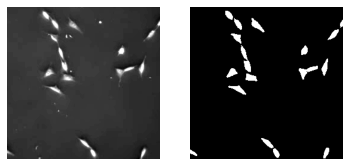

Accuracy                      : 0.9649915807387408
Average Jaccard score         : 0.5907396921101107
Number of cells in predictions: 57923
Number of cells in masks      : 16201


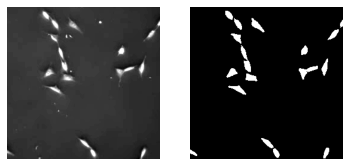

Accuracy                      : 0.9562012616325827
Average Jaccard score         : 0.5155623232413883
Number of cells in predictions: 74496
Number of cells in masks      : 16201


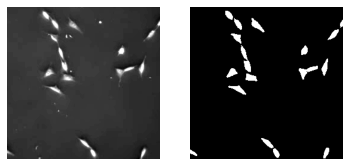

Accuracy                      : 0.9477428660673254
Average Jaccard score         : 0.45165401318662624
Number of cells in predictions: 91504
Number of cells in masks      : 16201


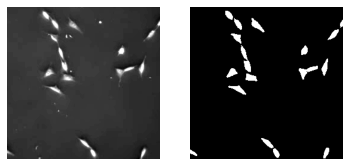

Accuracy                      : 0.9396783267750459
Average Jaccard score         : 0.39899513467930076
Number of cells in predictions: 107489
Number of cells in masks      : 16201


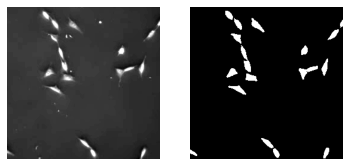

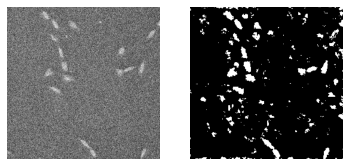

Accuracy                      : 0.93276741177428
Average Jaccard score         : 0.35513294446282
Number of cells in predictions: 121221
Number of cells in masks      : 16201


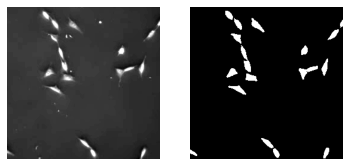

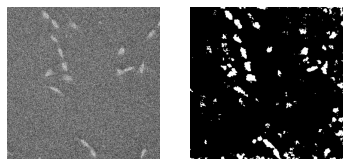

Accuracy                      : 0.9264489865770527
Average Jaccard score         : 0.3192168006968016
Number of cells in predictions: 135543
Number of cells in masks      : 16201


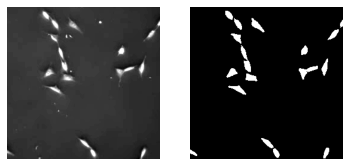

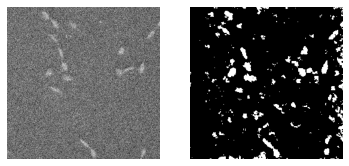

Accuracy                      : 0.9204760682349111
Average Jaccard score         : 0.28654209344926584
Number of cells in predictions: 146256
Number of cells in masks      : 16201


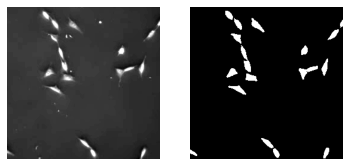

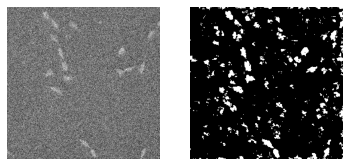

Accuracy                      : 0.9150171915690104
Average Jaccard score         : 0.2591522329429815
Number of cells in predictions: 156603
Number of cells in masks      : 16201


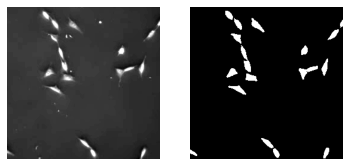

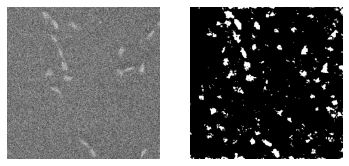

Accuracy                      : 0.9102589625938265
Average Jaccard score         : 0.23592439202972115
Number of cells in predictions: 167956
Number of cells in masks      : 16201


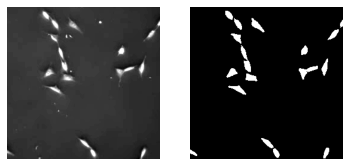

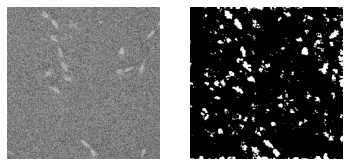

Accuracy                      : 0.9061386407590379
Average Jaccard score         : 0.21480091765319426
Number of cells in predictions: 174045
Number of cells in masks      : 16201


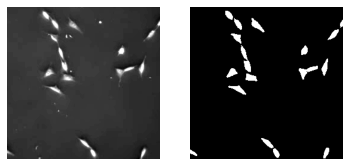

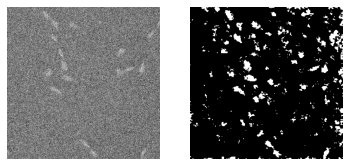

Accuracy                      : 0.9035720226811428
Average Jaccard score         : 0.20006569811625924
Number of cells in predictions: 179114
Number of cells in masks      : 16201


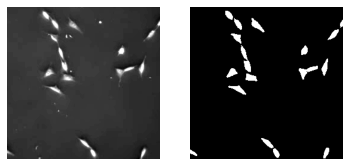

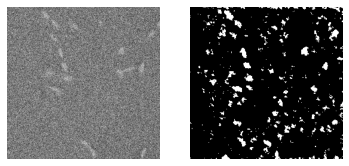

Accuracy                      : 0.9000929589365043
Average Jaccard score         : 0.1836463449913161
Number of cells in predictions: 185338
Number of cells in masks      : 16201


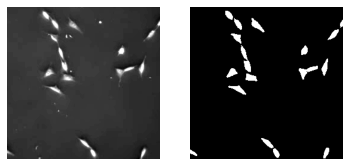

Accuracy                      : 0.8967240875842525
Average Jaccard score         : 0.17171305233186468
Number of cells in predictions: 192254
Number of cells in masks      : 16201


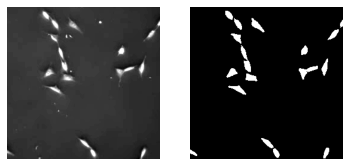

Accuracy                      : 0.8955792894550398
Average Jaccard score         : 0.16290715772001801
Number of cells in predictions: 194116
Number of cells in masks      : 16201


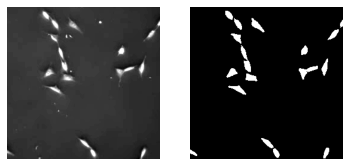

Accuracy                      : 0.8928522147384345
Average Jaccard score         : 0.15013298492094793
Number of cells in predictions: 198608
Number of cells in masks      : 16201


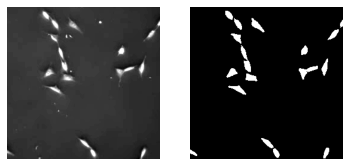

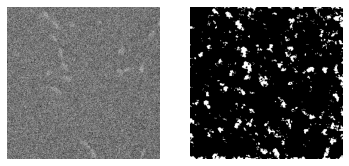

Accuracy                      : 0.8900179096296722
Average Jaccard score         : 0.1418658607054458
Number of cells in predictions: 203497
Number of cells in masks      : 16201


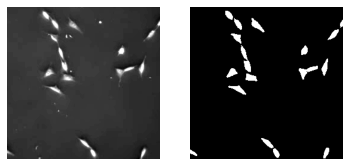

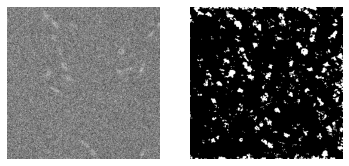

Accuracy                      : 0.8889702591241575
Average Jaccard score         : 0.134058014443216
Number of cells in predictions: 204130
Number of cells in masks      : 16201


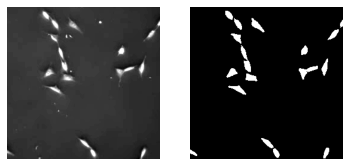

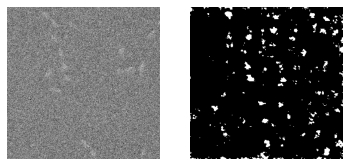

Accuracy                      : 0.8865201463886335
Average Jaccard score         : 0.12737694172755304
Number of cells in predictions: 210123
Number of cells in masks      : 16201


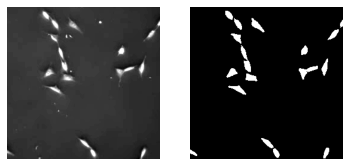

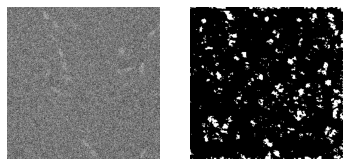

Accuracy                      : 0.8862808825922948
Average Jaccard score         : 0.12303441206573744
Number of cells in predictions: 210346
Number of cells in masks      : 16201


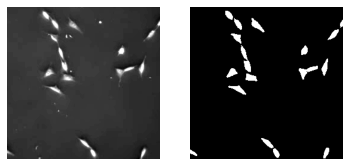

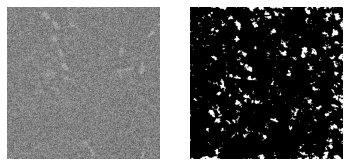

Accuracy                      : 0.8840032839307598
Average Jaccard score         : 0.11616076452278898
Number of cells in predictions: 213313
Number of cells in masks      : 16201


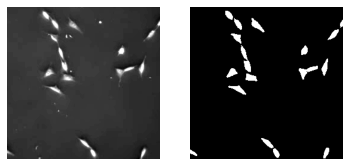

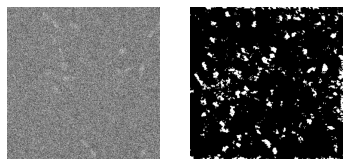

Accuracy                      : 0.8832560221354167
Average Jaccard score         : 0.11214030343023886
Number of cells in predictions: 213986
Number of cells in masks      : 16201


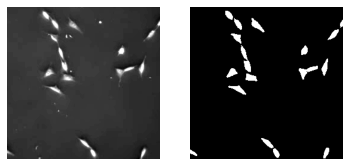

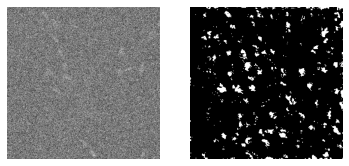

Accuracy                      : 0.8821261836033242
Average Jaccard score         : 0.10782774710072308
Number of cells in predictions: 216475
Number of cells in masks      : 16201


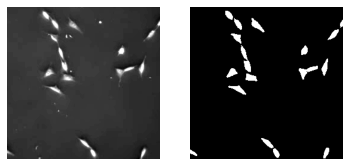

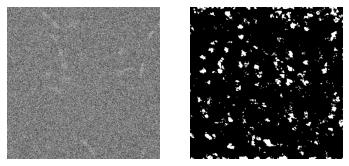

Accuracy                      : 0.8813609104530484
Average Jaccard score         : 0.1027748642694022
Number of cells in predictions: 216180
Number of cells in masks      : 16201


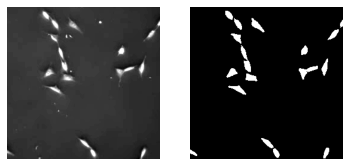

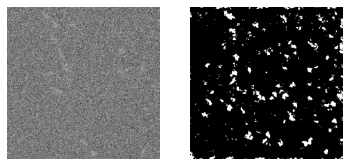

Accuracy                      : 0.8818448235006894
Average Jaccard score         : 0.09979980816497143
Number of cells in predictions: 214398
Number of cells in masks      : 16201


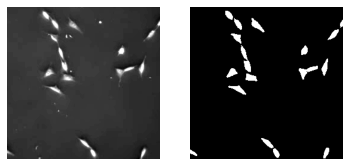

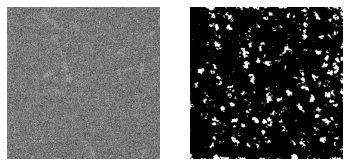

Accuracy                      : 0.879235091863894
Average Jaccard score         : 0.09591025906614484
Number of cells in predictions: 221089
Number of cells in masks      : 16201


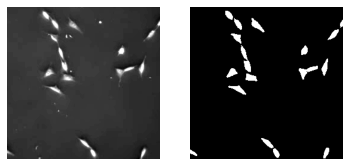

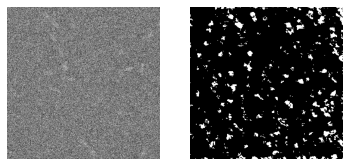

Accuracy                      : 0.8772441190831801
Average Jaccard score         : 0.09316458355527873
Number of cells in predictions: 225220
Number of cells in masks      : 16201


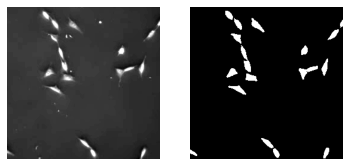

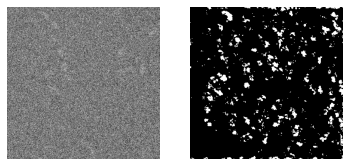

Accuracy                      : 0.8773778878006281
Average Jaccard score         : 0.09050541521009098
Number of cells in predictions: 224194
Number of cells in masks      : 16201


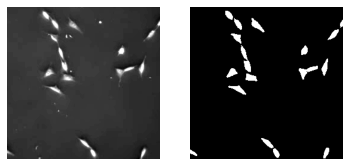

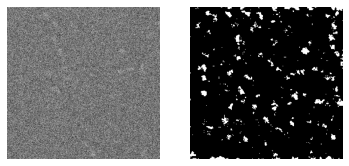

Accuracy                      : 0.8785001567765778
Average Jaccard score         : 0.08875671555686085
Number of cells in predictions: 220865
Number of cells in masks      : 16201


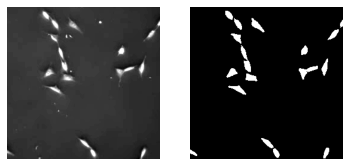

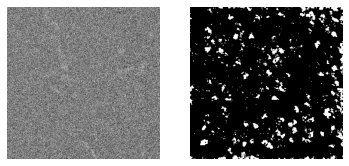

Accuracy                      : 0.875685209386489
Average Jaccard score         : 0.08488244377373298
Number of cells in predictions: 225509
Number of cells in masks      : 16201


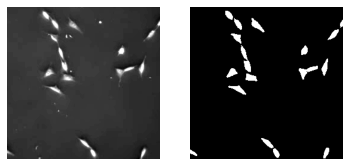

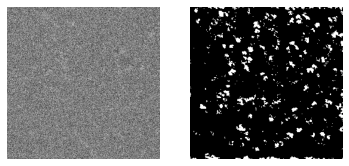

Accuracy                      : 0.8769072588752298
Average Jaccard score         : 0.08381595887398449
Number of cells in predictions: 221817
Number of cells in masks      : 16201


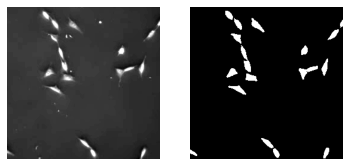

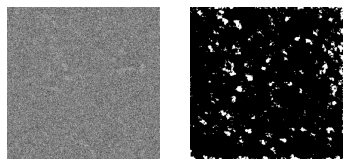

Accuracy                      : 0.8761703192018995
Average Jaccard score         : 0.0819581924884486
Number of cells in predictions: 224587
Number of cells in masks      : 16201


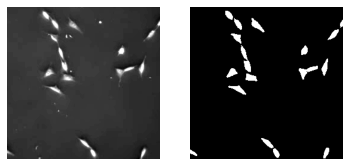

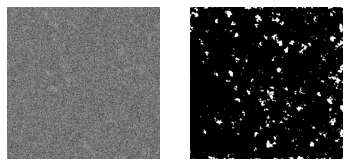

Accuracy                      : 0.8748171039656096
Average Jaccard score         : 0.07990059041844033
Number of cells in predictions: 228111
Number of cells in masks      : 16201


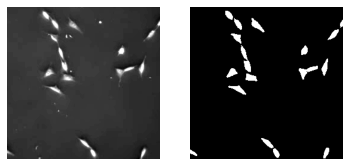

Accuracy                      : 0.8744178921568627
Average Jaccard score         : 0.07790095699524638
Number of cells in predictions: 227413
Number of cells in masks      : 16201


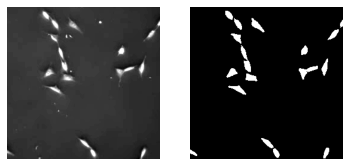

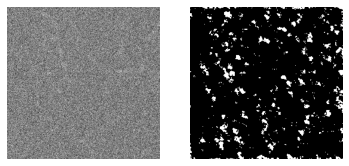

Accuracy                      : 0.8744598987055759
Average Jaccard score         : 0.07694144833416586
Number of cells in predictions: 226527
Number of cells in masks      : 16201


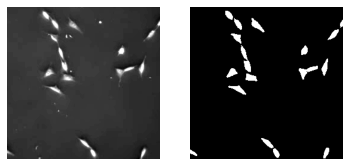

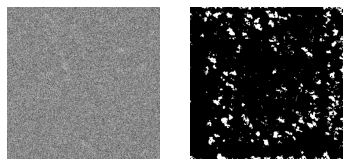

Accuracy                      : 0.8743277755438112
Average Jaccard score         : 0.07404372336822214
Number of cells in predictions: 225153
Number of cells in masks      : 16201


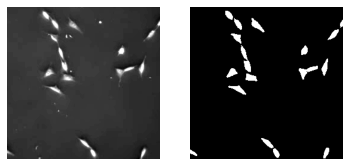

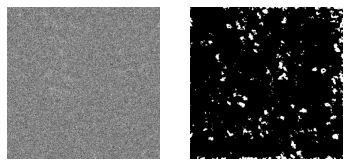

Accuracy                      : 0.8753779691808364
Average Jaccard score         : 0.07339757319769144
Number of cells in predictions: 223996
Number of cells in masks      : 16201


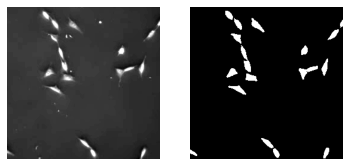

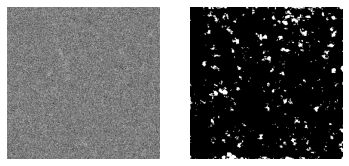

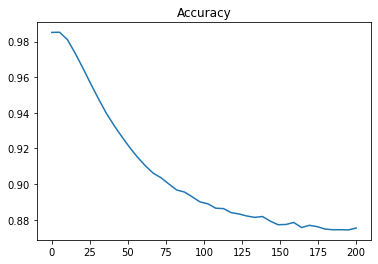

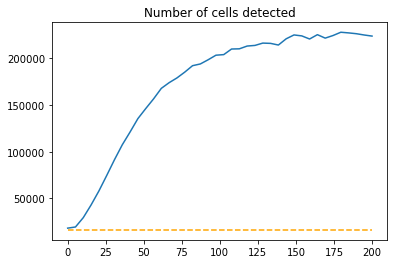

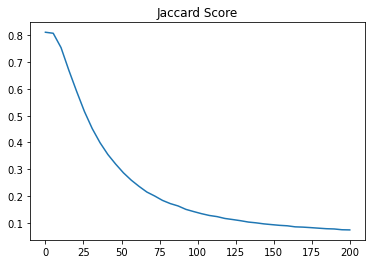

In [9]:
mean = 0
sigmas = np.linspace(0, 200, 40)
accuracies = []
jaccard_scores = []
number_cells_predictions = []
for sigma in sigmas:
    noisy_test_images = []

    for image in test_images:
        noisy_test_images.append(add_gaussian_noise(image, mean, sigma))

    accuracy, jaccard, n_cells_pred, _ = evaluate_model(np.array(noisy_test_images), test_masks, model, number_cells_masks)
    accuracies.append(accuracy)
    jaccard_scores.append(jaccard)
    number_cells_predictions.append(n_cells_pred)
    
    show_image_mask(test_images[0], test_masks[0])
    show_image_pred(noisy_test_images[0], model)
        
plot_all(sigmas, accuracies, jaccard_scores, number_cells_predictions, number_cells_masks)